### Index Long side strategy
- Time Frame: Daily
- RSI(7) - 7 periods
- SMA(8) & SMA(20)
- MACD(12,26,9)


#### Strategy Overview
- SMA, MACD are lagging trend indicators that help to identify the direction of the trend
- RSI is a leading momentum indicators that assesses general strength trend
- This strategy uses RSI as an early signal and SMA and MACD as a confirmation
- Bullish crossover happens when SMA8 > SMA20 and indicates upward trend
- We apply same time frame for both leading and lagging indicators (daily).

#### Entry Condition:

Signal: 
- If RSI(7) > 50
- Wait for x candles for either trend conditions to become true (confirmation)

Confirmation:
1. SMA(8) > SMA(20) (Bullish crossover) -> Long
2. MACD line crosses over the signal line (Uptrend) -> Long


#### Exit Conditions:

x = 5\
If SMA or MACD bullish cross up happens within x days, we will hold on to our positions. 


Exit condition 1:
- If SMA cross up or MACD do not happen within x days, we exit.

Exit Condition 2:
- If SMA cross up or MACD happens within x days, then hold position til either SMA cross down or MACD cross down (MACD histogram > 0)
- 4-5 years historical data

In [1]:
import os
# print(os.getcwd())
cwd = os.chdir(f"{os.getcwd()}/../") 
print(os.getcwd())

/Users/xyeng/PycharmProjects/Personal/quant-strategy-backtester


In [2]:
import pandas as pd
import numpy as np
import pytz
import os
from datetime import datetime as dtt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from data.data_utils import dl_ticker_hist
from src.backtester.strategies import sma_macd_rsi
from src.backtester.plot import plot_sma
from src.backtester.plot import plot_macd
from src.backtester.plot import plot_rsi
from src.backtester.plot import plot_equity_curve
from src.backtester.portfolio import generate_portfolio
from src.metrics.performance import calc_metrics
from src.metrics.performance import get_all_metrics_by_strategy
from src.metrics.trade import calc_trades, calc_trades_metrics, get_recent_trades



In [3]:
start = "2022-01-01"
end = "2026-01-29"
ticker = 'SPY'

In [4]:
hist_data = dl_ticker_hist(ticker, start, end)

/Users/xyeng/PycharmProjects/Personal/quant-strategy-backtester/data/yfinance_utils.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  return yf.download(ticker, sd, ed)
[*********************100%***********************]  1 of 1 completed

Index(['date', 'ticker', 'close_px', 'high_px', 'low_px', 'open_px', 'volume'], dtype='object')
           date ticker    close_px     high_px      low_px     open_px  \
0    2022-01-03    SPY  451.875122  452.007565  448.223887  450.541372   
1    2022-01-04    SPY  451.723785  454.022391  449.860323  453.303483   
2    2022-01-05    SPY  443.049713  452.130545  442.955115  451.354884   
3    2022-01-06    SPY  442.633514  445.357767  440.259248  442.586230   
4    2022-01-07    SPY  440.883606  443.825431  439.521480  442.643031   
...         ...    ...         ...         ...         ...         ...   
1016 2026-01-22    SPY  688.979980  691.130005  686.919983  689.849976   
1017 2026-01-23    SPY  689.229980  690.960022  687.159973  688.150024   
1018 2026-01-26    SPY  692.729980  694.130005  689.919983  690.489990   
1019 2026-01-27    SPY  695.489990  696.530029  693.570007  694.179993   
1020 2026-01-28    SPY  695.419983  697.840027  693.940002  697.049988   

         volume

In [5]:
FAST_SMA_PERIOD = 8
SLOW_SMA_PERIOD = 20
FAST_MACD_PERIOD = 12
SLOW_MACD_PERIOD = 26
MACD_SIGNAL_PERIOD = 9
RSI_PERIOD = 7

df = sma_macd_rsi(hist_data, sma_fast_period=FAST_SMA_PERIOD, sma_slow_period=SLOW_SMA_PERIOD, macd_fast_period=FAST_MACD_PERIOD, macd_slow_period=SLOW_MACD_PERIOD, macd_signal_period=MACD_SIGNAL_PERIOD, rsi_period=RSI_PERIOD)

           date ticker    close_px     high_px      low_px     open_px  \
0    2022-01-03    SPY  451.875122  452.007565  448.223887  450.541372   
1    2022-01-04    SPY  451.723785  454.022391  449.860323  453.303483   
2    2022-01-05    SPY  443.049713  452.130545  442.955115  451.354884   
3    2022-01-06    SPY  442.633514  445.357767  440.259248  442.586230   
4    2022-01-07    SPY  440.883606  443.825431  439.521480  442.643031   
...         ...    ...         ...         ...         ...         ...   
1016 2026-01-22    SPY  688.979980  691.130005  686.919983  689.849976   
1017 2026-01-23    SPY  689.229980  690.960022  687.159973  688.150024   
1018 2026-01-26    SPY  692.729980  694.130005  689.919983  690.489990   
1019 2026-01-27    SPY  695.489990  696.530029  693.570007  694.179993   
1020 2026-01-28    SPY  695.419983  697.840027  693.940002  697.049988   

         volume    sma_fast    sma_slow  
0      72668200         NaN         NaN  
1      71178700         NaN

In [6]:
display(df)

,date,ticker,close_px,high_px,low_px,open_px,volume,sma_fast,sma_slow,macd,...,sma_cross_long,rsi_long_signal,macd_cross_long,sma_cross_long_entry,macd_cross_long_entry,long_entry,long_exit,holding,days_in_position,trade
0,2022-01-03,SPY,451.875122,452.007565,448.223887,450.541372,72668200,NaN,NaN,0.000000,...,False,False,False,False,False,False,True,0,0,
1,2022-01-04,SPY,451.723785,454.022391,449.860323,453.303483,71178700,NaN,NaN,-0.012072,...,False,False,False,False,False,False,True,0,0,
2,2022-01-05,SPY,443.049713,452.130545,442.955115,451.354884,104538900,NaN,NaN,-0.713342,...,False,False,False,False,False,False,True,0,0,
3,2022-01-06,SPY,442.633514,445.357767,440.259248,442.586230,86858900,NaN,NaN,-1.287842,...,False,False,False,False,False,False,True,0,0,
4,2022-01-07,SPY,440.883606,443.825431,439.521480,442.643031,85111600,NaN,NaN,-1.862866,...,False,False,False,False,False,False,True,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,2026-01-22,SPY,688.979980,691.130005,686.919983,689.849976,77112200,689.393745,688.821997,1.881005,...,True,False,False,True,False,False,True,0,0,
1017,2026-01-23,SPY,689.229980,690.960022,687.159973,688.150024,63059600,688.652496,688.885495,1.829701,...,False,False,False,True,False,False,True,0,0,
1018,2026-01-26,SPY,692.729980,694.130005,689.919983,690.489990,60473800,688.522491,689.002994,2.047856,...,False,True,False,True,False,True,True,1,1,BUY
1019,2026-01-27,SPY,695.489990,696.530029,693.570007,694.179993,55506100,689.163742,689.261993,2.415610,...,False,True,False,True,False,True,True,0,0,SELL


In [7]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1021 non-null   datetime64[ns]
 1   ticker                 1021 non-null   object        
 2   close_px               1021 non-null   float64       
 3   high_px                1021 non-null   float64       
 4   low_px                 1021 non-null   float64       
 5   open_px                1021 non-null   float64       
 6   volume                 1021 non-null   int64         
 7   sma_fast               1014 non-null   float64       
 8   sma_slow               1002 non-null   float64       
 9   macd                   1021 non-null   float64       
 10  macd_signal            1021 non-null   float64       
 11  macd_histogram         1021 non-null   float64       
 12  rsi                    1014 non-null   float64       
 13  sma

date                     datetime64[ns]
ticker                           object
close_px                        float64
high_px                         float64
low_px                          float64
open_px                         float64
volume                            int64
sma_fast                        float64
sma_slow                        float64
macd                            float64
macd_signal                     float64
macd_histogram                  float64
rsi                             float64
sma_cross_long                     bool
rsi_long_signal                    bool
macd_cross_long                    bool
sma_cross_long_entry               bool
macd_cross_long_entry              bool
long_entry                         bool
long_exit                          bool
holding                           int64
days_in_position                  int64
trade                            object
dtype: object

### Plot indicators

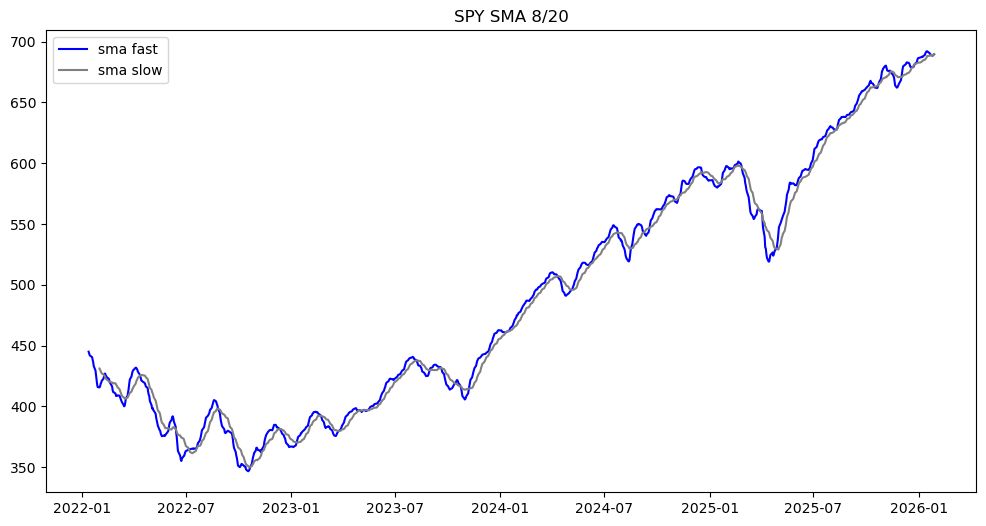

In [8]:
plot_sma(df, ticker, FAST_SMA_PERIOD, SLOW_SMA_PERIOD)

When MACD line > signal line, histogram is positive
- Shows bullish momentum and indicates potential long signal

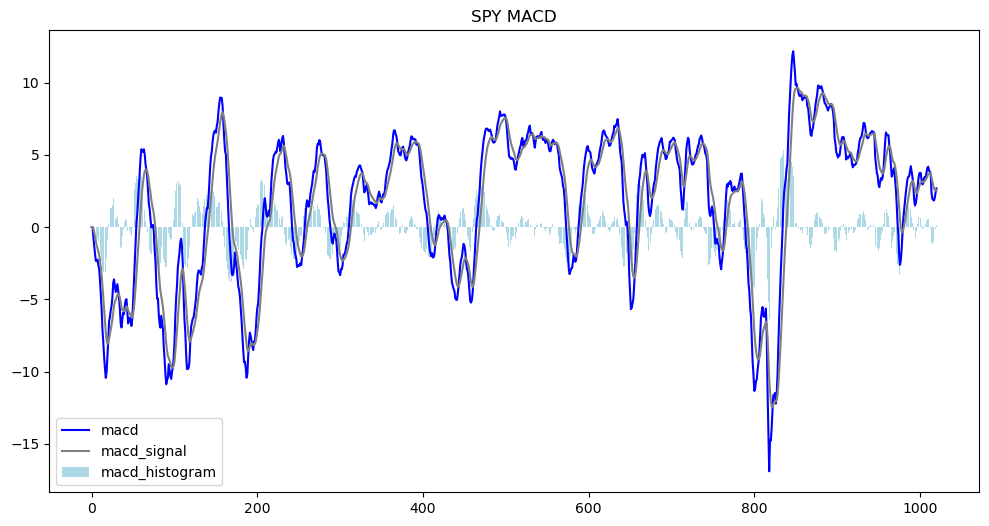

In [9]:
macd_df = df[['macd','macd_signal','macd_histogram']]
plot_macd(macd_df, ticker)

- When MACD line > signal line, histogram is positive
    - Shows bullish momentum and indicates potential long signal

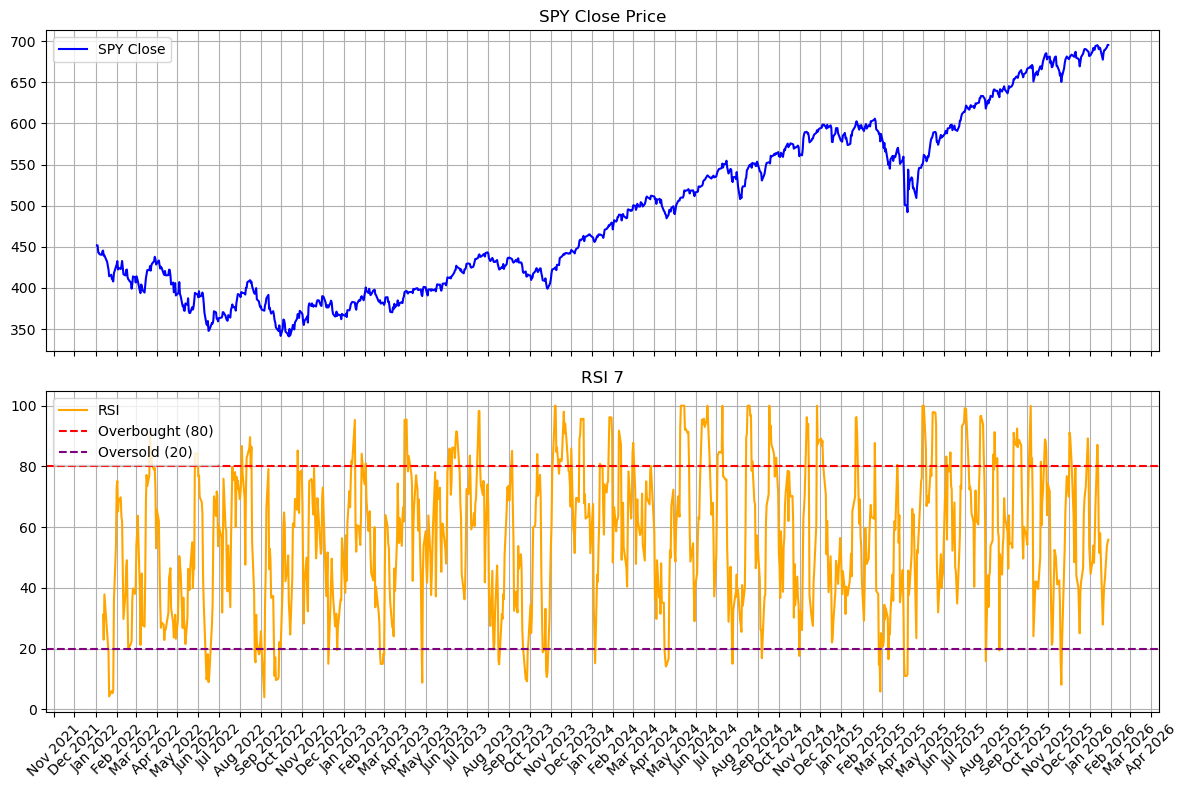

In [10]:
plot_rsi(df, ticker, RSI_PERIOD)

In [11]:
display(df)

,date,ticker,close_px,high_px,low_px,open_px,volume,sma_fast,sma_slow,macd,...,sma_cross_long,rsi_long_signal,macd_cross_long,sma_cross_long_entry,macd_cross_long_entry,long_entry,long_exit,holding,days_in_position,trade
0,2022-01-03,SPY,451.875122,452.007565,448.223887,450.541372,72668200,NaN,NaN,0.000000,...,False,False,False,False,False,False,True,0,0,
1,2022-01-04,SPY,451.723785,454.022391,449.860323,453.303483,71178700,NaN,NaN,-0.012072,...,False,False,False,False,False,False,True,0,0,
2,2022-01-05,SPY,443.049713,452.130545,442.955115,451.354884,104538900,NaN,NaN,-0.713342,...,False,False,False,False,False,False,True,0,0,
3,2022-01-06,SPY,442.633514,445.357767,440.259248,442.586230,86858900,NaN,NaN,-1.287842,...,False,False,False,False,False,False,True,0,0,
4,2022-01-07,SPY,440.883606,443.825431,439.521480,442.643031,85111600,NaN,NaN,-1.862866,...,False,False,False,False,False,False,True,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,2026-01-22,SPY,688.979980,691.130005,686.919983,689.849976,77112200,689.393745,688.821997,1.881005,...,True,False,False,True,False,False,True,0,0,
1017,2026-01-23,SPY,689.229980,690.960022,687.159973,688.150024,63059600,688.652496,688.885495,1.829701,...,False,False,False,True,False,False,True,0,0,
1018,2026-01-26,SPY,692.729980,694.130005,689.919983,690.489990,60473800,688.522491,689.002994,2.047856,...,False,True,False,True,False,True,True,1,1,BUY
1019,2026-01-27,SPY,695.489990,696.530029,693.570007,694.179993,55506100,689.163742,689.261993,2.415610,...,False,True,False,True,False,True,True,0,0,SELL


#### Exit Conditions:

x = 5\
If SMA or MACD bullish cross up happens within x days, we will hold on to our positions. 


Exit condition 1:
- If SMA cross up or MACD do not happen within x days, we exit.

Exit Condition 2:
- If SMA cross up or MACD happens within x days, then hold position til either SMA cross down or MACD cross down (MACD histogram > 0)
- 4-5 years historical data

## Backtest Strategy
#### Market-On-Close Execution
- Execute trade at or as close as possible to the official closing price of a trading day
- Signal at today's close -> trade executed at today's close -> PnL starts tomorrow


In [12]:
# Backtest strategy
initial_capital = 100000
allocation = 0.5 # 50% of capital
cost_per_shr = 0.005 # USD per share. Sometimes its cost_per_trade but assumption here is cost per share


In [13]:
display(df[(df['long_entry']==True) ]) #| (df['long_exit']==True)
# display(df[(df['position']==1)])

,date,ticker,close_px,high_px,low_px,open_px,volume,sma_fast,sma_slow,macd,...,sma_cross_long,rsi_long_signal,macd_cross_long,sma_cross_long_entry,macd_cross_long_entry,long_entry,long_exit,holding,days_in_position,trade
20,2022-02-01,SPY,428.454132,429.097350,422.769148,426.306877,123155400,416.407909,430.024422,-7.842601,...,False,True,True,False,True,True,True,1,1,BUY
21,2022-02-02,SPY,432.616241,433.344589,428.548771,430.866285,117361000,418.698212,429.069044,-6.524173,...,False,True,False,False,True,True,True,0,0,SELL
22,2022-02-03,SPY,422.447601,428.473103,421.605719,426.562356,118024400,419.497513,428.038939,-6.228041,...,False,True,False,False,True,True,True,1,1,BUY
23,2022-02-04,SPY,424.434052,428.293390,419.827400,422.211135,118454400,421.180065,427.128966,-5.766591,...,False,True,False,False,True,True,True,0,0,SELL
24,2022-02-07,SPY,423.071960,426.600222,421.738211,425.200279,84472900,422.821239,426.238383,-5.447996,...,False,True,False,False,True,True,True,1,1,BUY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,2026-01-15,SPY,692.239990,695.450012,691.250000,694.570007,77862000,692.062500,687.106943,3.822095,...,True,True,False,True,False,True,True,0,0,SELL
1013,2026-01-16,SPY,691.659973,694.250000,690.099976,693.659973,79289200,692.043747,688.218845,3.656527,...,True,True,False,True,False,True,True,1,1,BUY
1018,2026-01-26,SPY,692.729980,694.130005,689.919983,690.489990,60473800,688.522491,689.002994,2.047856,...,False,True,False,True,False,True,True,1,1,BUY
1019,2026-01-27,SPY,695.489990,696.530029,693.570007,694.179993,55506100,689.163742,689.261993,2.415610,...,False,True,False,True,False,True,True,0,0,SELL


In [14]:
# Generate portfolio positions, trades, pnl, returns
df = generate_portfolio(df, allocation, initial_capital, cost_per_shr)

           date ticker    close_px     high_px      low_px     open_px  \
20   2022-02-01    SPY  428.454132  429.097350  422.769148  426.306877   
21   2022-02-02    SPY  432.616241  433.344589  428.548771  430.866285   
22   2022-02-03    SPY  422.447601  428.473103  421.605719  426.562356   
23   2022-02-04    SPY  424.434052  428.293390  419.827400  422.211135   
24   2022-02-07    SPY  423.071960  426.600222  421.738211  425.200279   
...         ...    ...         ...         ...         ...         ...   
1013 2026-01-16    SPY  691.659973  694.250000  690.099976  693.659973   
1014 2026-01-20    SPY  677.580017  684.770020  676.570007  681.489990   
1018 2026-01-26    SPY  692.729980  694.130005  689.919983  690.489990   
1019 2026-01-27    SPY  695.489990  696.530029  693.570007  694.179993   
1020 2026-01-28    SPY  695.419983  697.840027  693.940002  697.049988   

         volume    sma_fast    sma_slow      macd  ...  macd_cross_long_entry  \
20    123155400  416.407909  4

In [15]:
display(df[['date', 'long_entry', 'long_exit', 'holding', 'position', 'position_shrs']])
display(df[df['trade']!=''][['date', 'long_entry', 'long_exit', 'holding', 'position', 'position_shrs','trade']])

,date,long_entry,long_exit,holding,position,position_shrs
0,2022-01-03,False,True,0,0.0,0.0
1,2022-01-04,False,True,0,0.0,0.0
2,2022-01-05,False,True,0,0.0,0.0
3,2022-01-06,False,True,0,0.0,0.0
4,2022-01-07,False,True,0,0.0,0.0
...,...,...,...,...,...,...
1016,2026-01-22,False,True,0,0.0,72.0
1017,2026-01-23,False,True,0,0.0,72.0
1018,2026-01-26,True,True,1,50000.0,72.0
1019,2026-01-27,True,True,0,0.0,0.0


,date,long_entry,long_exit,holding,position,position_shrs,trade
20,2022-02-01,True,True,1,50000.0,116.0,BUY
21,2022-02-02,True,True,0,0.0,0.0,SELL
22,2022-02-03,True,True,1,50000.0,118.0,BUY
23,2022-02-04,True,True,0,0.0,0.0,SELL
24,2022-02-07,True,True,1,50000.0,118.0,BUY
...,...,...,...,...,...,...,...
1013,2026-01-16,True,True,1,50000.0,72.0,BUY
1014,2026-01-20,False,True,0,0.0,0.0,SELL
1018,2026-01-26,True,True,1,50000.0,72.0,BUY
1019,2026-01-27,True,True,0,0.0,0.0,SELL


In [16]:
display(df[df['trade']!=''])
display(df)

,date,ticker,close_px,high_px,low_px,open_px,volume,sma_fast,sma_slow,macd,...,trade,position,position_shrs,trade_shrs,trade_cost,daily_ret_c2c,daily_pnl,cum_pnl,cum_ret,cum_ret_pct
20,2022-02-01,SPY,428.454132,429.097350,422.769148,426.306877,123155400,416.407909,430.024422,-7.842601,...,BUY,50000.0,116.0,116,0.580,0.006757,-0.580000,99999.420000,0.948169,-0.000580
21,2022-02-02,SPY,432.616241,433.344589,428.548771,430.866285,117361000,418.698212,429.069044,-6.524173,...,SELL,0.0,0.0,0,0.000,0.009714,485.712363,100485.132363,0.957380,0.485132
22,2022-02-03,SPY,422.447601,428.473103,421.605719,426.562356,118024400,419.497513,428.038939,-6.228041,...,BUY,50000.0,118.0,118,0.590,-0.023505,-0.590000,100484.542363,0.934877,0.484542
23,2022-02-04,SPY,424.434052,428.293390,419.827400,422.211135,118454400,421.180065,427.128966,-5.766591,...,SELL,0.0,0.0,0,0.000,0.004702,235.112022,100719.654385,0.939273,0.719654
24,2022-02-07,SPY,423.071960,426.600222,421.738211,425.200279,84472900,422.821239,426.238383,-5.447996,...,BUY,50000.0,118.0,118,0.590,-0.003209,-0.590000,100719.064385,0.936259,0.719064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,2026-01-16,SPY,691.659973,694.250000,690.099976,693.659973,79289200,692.043747,688.218845,3.656527,...,BUY,50000.0,72.0,72,0.360,-0.000838,-0.360000,101522.083666,1.530644,1.522084
1014,2026-01-20,SPY,677.580017,684.770020,676.570007,681.489990,111623300,690.543747,688.373999,2.361950,...,SELL,0.0,0.0,0,0.000,-0.020357,-1017.837999,100504.245668,1.499485,0.504246
1018,2026-01-26,SPY,692.729980,694.130005,689.919983,690.489990,60473800,688.522491,689.002994,2.047856,...,BUY,50000.0,72.0,72,0.360,0.005078,-0.360000,100503.885668,1.533012,0.503886
1019,2026-01-27,SPY,695.489990,696.530029,693.570007,694.179993,55506100,689.163742,689.261993,2.415610,...,SELL,0.0,0.0,0,0.000,0.003984,199.212525,100703.098192,1.539120,0.703098


,date,ticker,close_px,high_px,low_px,open_px,volume,sma_fast,sma_slow,macd,...,trade,position,position_shrs,trade_shrs,trade_cost,daily_ret_c2c,daily_pnl,cum_pnl,cum_ret,cum_ret_pct
0,2022-01-03,SPY,451.875122,452.007565,448.223887,450.541372,72668200,NaN,NaN,0.000000,...,,0.0,0.0,0,0.000,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,SPY,451.723785,454.022391,449.860323,453.303483,71178700,NaN,NaN,-0.012072,...,,0.0,0.0,0,0.000,-0.000335,-0.000000,100000.000000,0.999665,0.000000
2,2022-01-05,SPY,443.049713,452.130545,442.955115,451.354884,104538900,NaN,NaN,-0.713342,...,,0.0,0.0,0,0.000,-0.019202,-0.000000,100000.000000,0.980469,0.000000
3,2022-01-06,SPY,442.633514,445.357767,440.259248,442.586230,86858900,NaN,NaN,-1.287842,...,,0.0,0.0,0,0.000,-0.000939,-0.000000,100000.000000,0.979548,0.000000
4,2022-01-07,SPY,440.883606,443.825431,439.521480,442.643031,85111600,NaN,NaN,-1.862866,...,,0.0,0.0,0,0.000,-0.003953,-0.000000,100000.000000,0.975676,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,2026-01-22,SPY,688.979980,691.130005,686.919983,689.849976,77112200,689.393745,688.821997,1.881005,...,,0.0,72.0,0,0.000,0.005223,0.000000,100504.245668,1.524713,0.504246
1017,2026-01-23,SPY,689.229980,690.960022,687.159973,688.150024,63059600,688.652496,688.885495,1.829701,...,,0.0,72.0,0,0.000,0.000363,0.000000,100504.245668,1.525266,0.504246
1018,2026-01-26,SPY,692.729980,694.130005,689.919983,690.489990,60473800,688.522491,689.002994,2.047856,...,BUY,50000.0,72.0,72,0.360,0.005078,-0.360000,100503.885668,1.533012,0.503886
1019,2026-01-27,SPY,695.489990,696.530029,693.570007,694.179993,55506100,689.163742,689.261993,2.415610,...,SELL,0.0,0.0,0,0.000,0.003984,199.212525,100703.098192,1.539120,0.703098


In [17]:
exit_df = df.copy()
exit_df = exit_df[exit_df['long_exit']==True]
display(exit_df[['date', 'ticker', 'close_px', 'rsi_long_signal', 'sma_cross_long', 'macd_cross_long', 'long_exit']])

,date,ticker,close_px,rsi_long_signal,sma_cross_long,macd_cross_long,long_exit
0,2022-01-03,SPY,451.875122,False,False,False,True
1,2022-01-04,SPY,451.723785,False,False,False,True
2,2022-01-05,SPY,443.049713,False,False,False,True
3,2022-01-06,SPY,442.633514,False,False,False,True
4,2022-01-07,SPY,440.883606,False,False,False,True
...,...,...,...,...,...,...,...
1016,2026-01-22,SPY,688.979980,False,True,False,True
1017,2026-01-23,SPY,689.229980,False,False,False,True
1018,2026-01-26,SPY,692.729980,True,False,False,True
1019,2026-01-27,SPY,695.489990,True,False,False,True


In [18]:
date_str = dtt.now(pytz.timezone('America/New_York')).strftime('%Y_%m_%d')
strategy_id = f'sma_macd_rsi_{date_str}'


### Metrics

In [19]:
# Metrics
metrics_df = calc_metrics(df, ticker, strategy_id)
display(metrics_df)

total_return: 53.9%
sharpe: 0.68%
max_drawdown: -0.24%
total_pnl: $702.74


,ticker,strategy_id,total_return,sharpe_ratio,max_drawdown,total_pnl
0,SPY,sma_macd_rsi_2026_02_16,53.9,0.68,-0.24,702.74


In [20]:

metrics_dir = f'results/metrics/{strategy_id}'
if metrics_dir is not None:
    os.makedirs(metrics_dir, exist_ok=True)
trades_df = calc_trades(df)
trade_metrics_df = calc_trades_metrics(df, ticker, strategy_id, metrics_dir)
recent_trades_df = get_recent_trades(trades_df, ticker, strategy_id, metrics_dir)


           date  long_entry  long_exit  position  position_shrs trade  \
1011 2026-01-14        True       True   50000.0           72.0   BUY   
1012 2026-01-15        True       True       0.0            0.0  SELL   
1013 2026-01-16        True       True   50000.0           72.0   BUY   
1014 2026-01-20       False       True       0.0            0.0  SELL   
1015 2026-01-21       False       True       0.0           72.0         
1016 2026-01-22       False       True       0.0           72.0         
1017 2026-01-23       False       True       0.0           72.0         
1018 2026-01-26        True       True   50000.0           72.0   BUY   
1019 2026-01-27        True       True       0.0            0.0  SELL   
1020 2026-01-28        True       True   50000.0           71.0   BUY   

      trade_shrs  trade_id  
1011          72     299.0  
1012           0     299.0  
1013          72     300.0  
1014           0     300.0  
1015           0       NaN  
1016           0      

In [21]:
display(trade_metrics_df)

,strategy_id,entries,exits,profitable_trades,non_profitable_trades,total_trades,pct_profitable,avg_pnl_per_trade
0,sma_macd_rsi_2026_02_16,302,301,159,143,302,52.65,2.33


In [22]:
display(recent_trades_df)

,date,long_entry,long_exit,position,position_shrs,trade,trade_shrs,trade_id
1011,2026-01-14,True,True,50000.0,72.0,BUY,72,299.0
1012,2026-01-15,True,True,0.0,0.0,SELL,0,299.0
1013,2026-01-16,True,True,50000.0,72.0,BUY,72,300.0
1014,2026-01-20,False,True,0.0,0.0,SELL,0,300.0
1015,2026-01-21,False,True,0.0,72.0,,0,NaN
1016,2026-01-22,False,True,0.0,72.0,,0,NaN
1017,2026-01-23,False,True,0.0,72.0,,0,NaN
1018,2026-01-26,True,True,50000.0,72.0,BUY,72,301.0
1019,2026-01-27,True,True,0.0,0.0,SELL,0,301.0
1020,2026-01-28,True,True,50000.0,71.0,BUY,71,302.0


In [23]:
metrics_df = pd.concat([metrics_df, trade_metrics_df], axis=1)
display(metrics_df)
metrics_df.to_csv(f'{metrics_dir}/metrics_{strategy_id}_{ticker.lower().replace("-","_")}.csv', index=False)


,ticker,strategy_id,total_return,sharpe_ratio,max_drawdown,total_pnl,strategy_id,entries,exits,profitable_trades,non_profitable_trades,total_trades,pct_profitable,avg_pnl_per_trade
0,SPY,sma_macd_rsi_2026_02_16,53.9,0.68,-0.24,702.74,sma_macd_rsi_2026_02_16,302,301,159,143,302,52.65,2.33


#### Cumulative PnL / Equity Curve

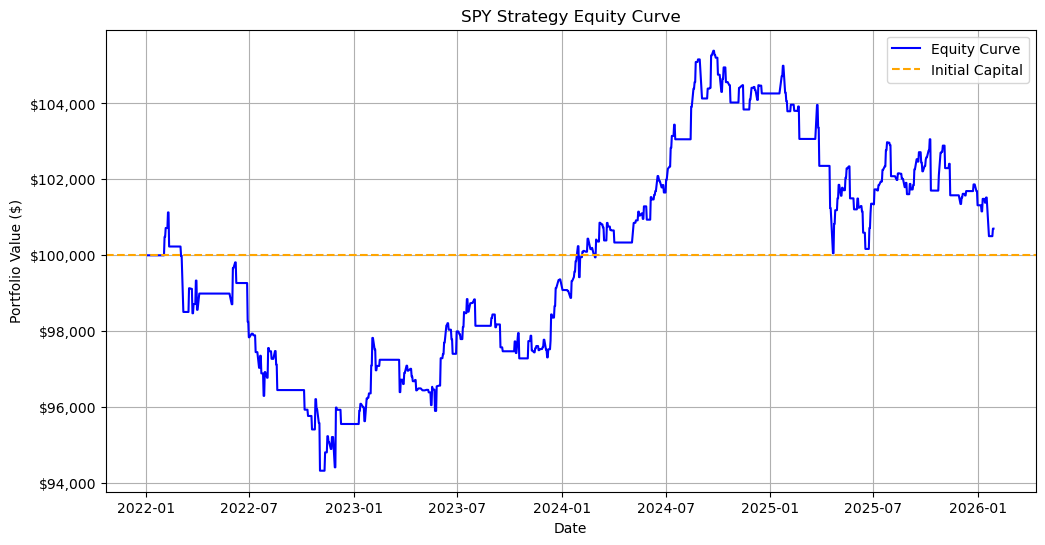

<Figure size 640x480 with 0 Axes>

In [24]:
plot_equity_curve(df, ticker, initial_capital)

### All metrics across different tickers

In [25]:
all_metrics_df = get_all_metrics_by_strategy(strategy_id)
display(all_metrics_df)

,ticker,strategy_id,total_return,sharpe_ratio,max_drawdown,total_pnl,strategy_id.1,entries,exits,profitable_trades,non_profitable_trades,total_trades,pct_profitable,avg_pnl_per_trade
0,QQQM,sma_macd_rsi_2026_02_16,$62.13,0.630000,-34.00%,"$12,620.76",sma_macd_rsi_2026_02_16,289,288,158,131,289,54.67%,$43.67
1,GLD,sma_macd_rsi_2026_02_16,$193.80,1.710000,-21.00%,"$16,045.75",sma_macd_rsi_2026_02_16,282,281,152,130,282,53.9%,$56.90
2,SPY,sma_macd_rsi_2026_02_16,$53.90,0.680000,-24.00%,$702.74,sma_macd_rsi_2026_02_16,302,301,159,143,302,52.65%,$2.33


- Sharpe ratio 1+ decent, 1.5 very good. 2+ excellent
- Max drawdown 20-40%
- Win rate 40-60%
- Avg pnl per trade > 0

